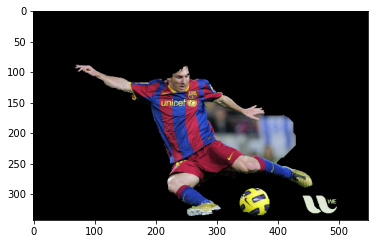

(<matplotlib.image.AxesImage at 0x2968ed674c0>, None)

In [23]:
import numpy as np
import cv2 as cv 
from matplotlib import pyplot as plt
img7 = cv.imread('../Images/img7.jpg')
mask = np.zeros(img7.shape[:2],np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
rect = (50,50,450,290)
cv.grabCut(img7,mask,rect,bgdModel,fgdModel,5,cv.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img7 = img7 * mask2[:,:,np.newaxis]
img7 = img7[:,:,::-1]
plt.imshow(img7),plt.show()

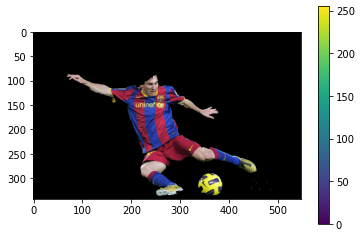

(<matplotlib.image.AxesImage at 0x2968edaf070>,
 None)

In [24]:
#newmask是用PS标记过的mask图像
newmask = cv.imread('../Images/img7_2.png',0)
#res, thresh= cv.threshold(newmask, 175, 255, cv.THRESH_BINARY)
# 标记为白色（确保前景）的地方，更改mask = 1
# 标记为黑色（确保背景）的地方，更改mask = 0
mask[ newmask == 0] = 0
mask[ newmask == 255] = 1
mask, bgdModel, fgdModel = cv.grabCut(img7,mask,None,bgdModel,fgdModel,5,cv.GC_INIT_WITH_MASK)
mask = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img7 = img7 * mask[:,:,np.newaxis]
plt.imshow(img7 ),plt.colorbar(),plt.show()